In [392]:
# Importa as bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
dados = pd.read_csv("dados_produtos.csv",sep=',') #Importa o csv e Dados

In [394]:
dados.describe() # Mostra informações estatisticas do Dataframe

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [395]:
dados.info() # Mostra a informações sobre o arquivo do Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [396]:
dados.head(10) # Demonstra os primeiros itens do Dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
5,Celular,3.98,1413,0
6,iPod,3.50,1907,0
7,Notebook,4.76,3857,0
8,Videogame,3.94,2800,1
9,Televisão,4.68,2600,0


Text(0.5, 1.0, 'Venda')

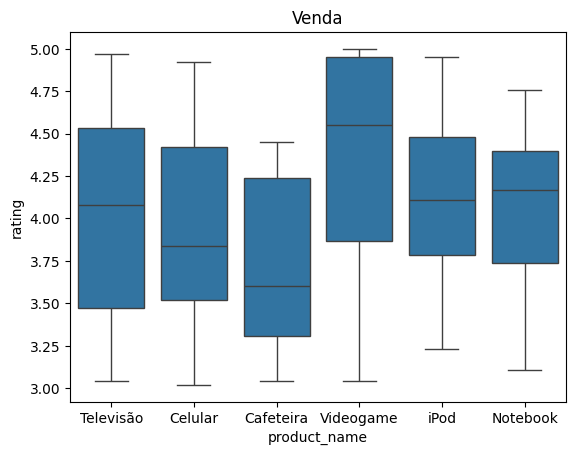

In [397]:
sns.boxplot(x=dados['product_name'],y=dados['rating']) # boxplot com as colunas "rating" e "rating_count"
plt.title("Venda") # Adiciona um titulo para o Boxplot


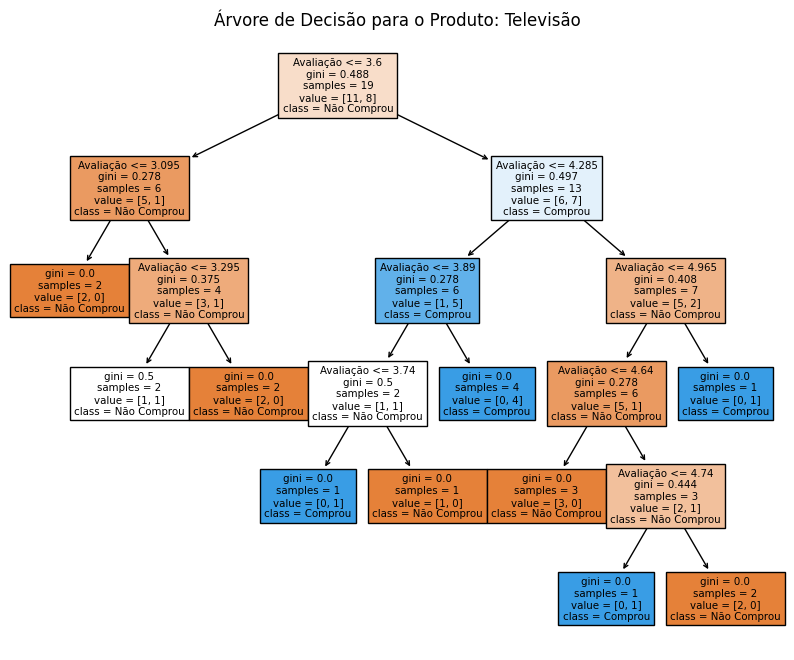

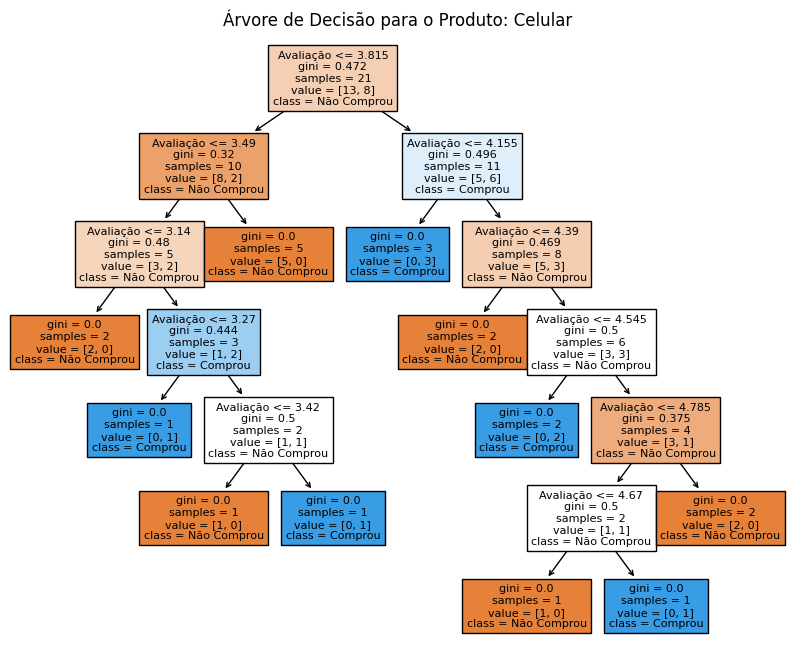

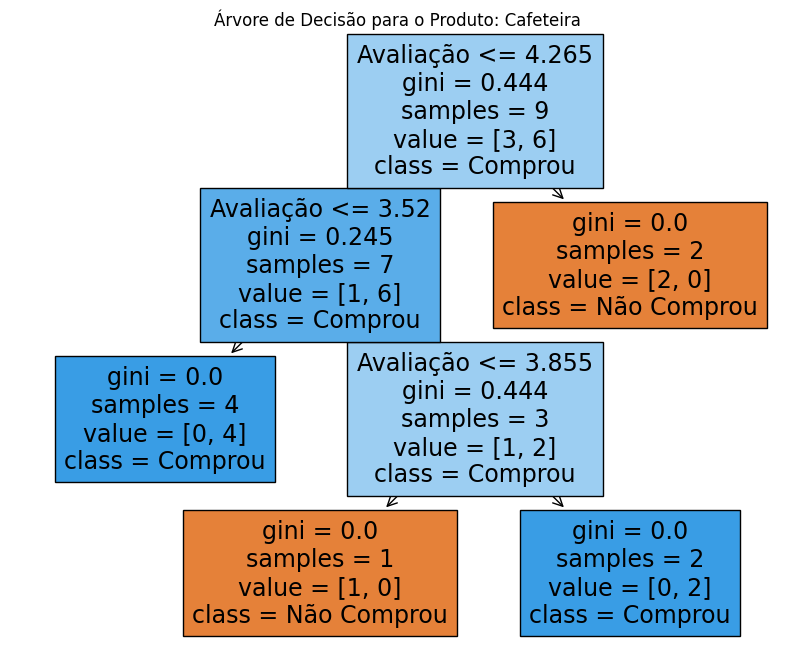

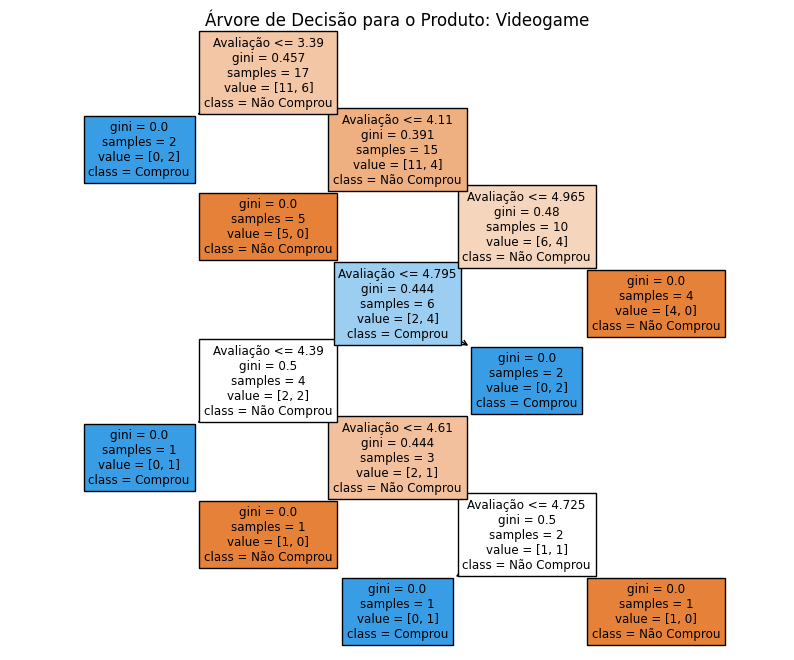

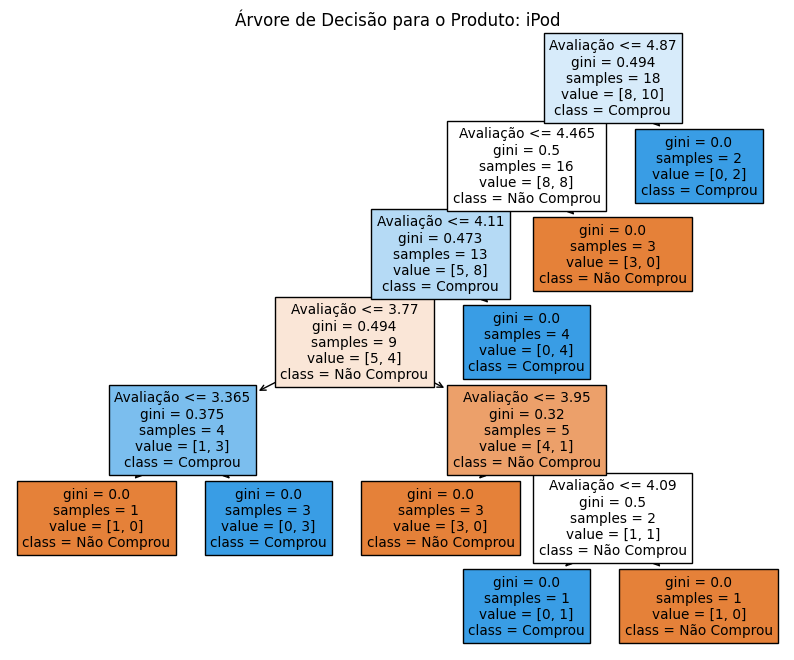

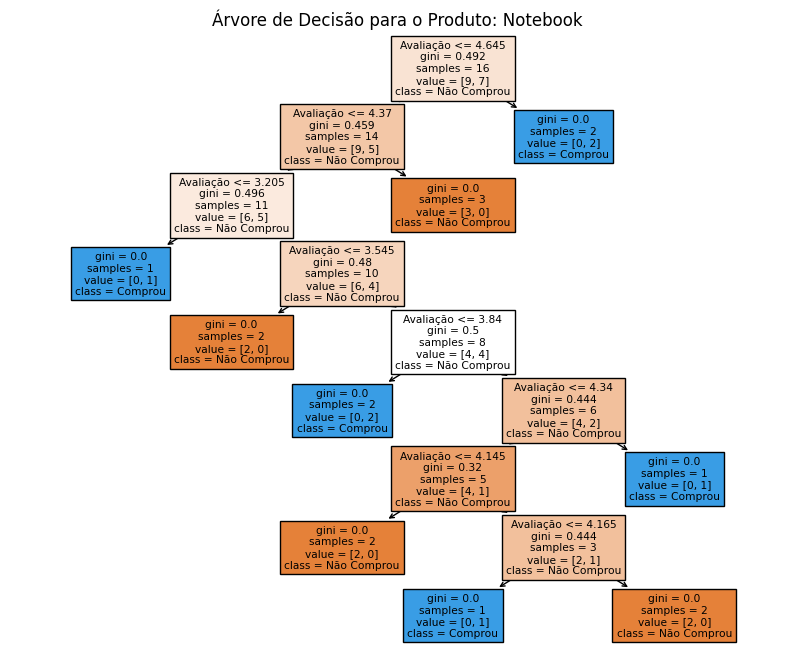

Produto: Televisão
Acurácia: 0.95
Matriz de Confusão:
[[11  0]
 [ 1  7]]
Precisão: 0.95
Recall: 0.95
F1-Score: 0.95


Produto: Celular
Acurácia: 1.00
Matriz de Confusão:
[[13  0]
 [ 0  8]]
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


Produto: Cafeteira
Acurácia: 1.00
Matriz de Confusão:
[[3 0]
 [0 6]]
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


Produto: Videogame
Acurácia: 1.00
Matriz de Confusão:
[[11  0]
 [ 0  6]]
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


Produto: iPod
Acurácia: 1.00
Matriz de Confusão:
[[ 8  0]
 [ 0 10]]
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


Produto: Notebook
Acurácia: 1.00
Matriz de Confusão:
[[9 0]
 [0 7]]
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00




In [398]:
dic_colunas = { # Renomeando as colunas
    'product_name': 'Nome_do_produto',
    'rating': 'Avaliação',
    'rating_count': 'Contagem_avaliação',
    'purchased': 'comprado'
}
dados = dados.rename(dic_colunas, axis=1)  

# Preenche os possiveis espaçoes vazios do dataframe
dados = dados.replace('', np.nan)


dados["comprado"] = dados["comprado"].map({0: "Não Comprou", 1: "Comprou"}) # Trocando os dados da coluna "purchased" de bool para String

# Transformando as colunas do dataframe em arrays para fazer a separação dos conjuntos de teste e treino
Avaliação = np.array(dados["Avaliação"])
comprado = np.array(dados["comprado"])

# Vendo os produtos unicos
produtos_unicos = dados['Nome_do_produto'].unique()

# Criando um dicionario de cada produto
modelos_por_produto = {}
metricas_por_produto = {}

# Iterando os produtos únicos e treinando um modelo para cada produto
for produto in produtos_unicos:
    dados_produto = dados[dados['Nome_do_produto'] == produto]
    X_produto = dados_produto[['Avaliação']].values
    y_produto = dados_produto['comprado'].values

    # Criando e treinando um modelo de árvore de decisão para o produto atual
    modelo_produto = DecisionTreeClassifier()
    modelo_produto.fit(X_produto, y_produto)

    # Armazenando o modelo treinado no dicionário
    modelos_por_produto[produto] = modelo_produto

    # Previsões com o modelo
    previsoes_produto = modelo_produto.predict(X_produto)

    # Calculando métricas para o produto atual
    acuracia_produto = accuracy_score(y_produto, previsoes_produto)
    matriz_confusao_produto = confusion_matrix(y_produto, previsoes_produto)
    precisao_produto = precision_score(y_produto, previsoes_produto, average='weighted')
    recall_produto = recall_score(y_produto, previsoes_produto, average='weighted')
    f1_produto = f1_score(y_produto, previsoes_produto, average='weighted')

    # Armazenando métricas no dicionário 
    metricas_por_produto[produto] = {
        'Acurácia': acuracia_produto,
        'Matriz de Confusão': matriz_confusao_produto,
        'Precisão': precisao_produto,
        'Recall': recall_produto,
        'F1-Score': f1_produto
    }

    # Plotando a árvore de decisão para o produto 
    plt.figure(figsize=(10, 8))
    tree.plot_tree(modelo_produto, feature_names=["Avaliação"], class_names=["Não Comprou", "Comprou"], filled=True)
    plt.title(f"Árvore de Decisão para o Produto: {produto}")
    plt.show()

# Métricas para cada produto
for produto, metricas in metricas_por_produto.items():
    print(f"Produto: {produto}")
    print(f"Acurácia: {metricas['Acurácia']:.2f}")
    print(f"Matriz de Confusão:\n{metricas['Matriz de Confusão']}")
    print(f"Precisão: {metricas['Precisão']:.2f}")
    print(f"Recall: {metricas['Recall']:.2f}")
    print(f"F1-Score: {metricas['F1-Score']:.2f}")
    print("\n")
